In [1]:
## Install the necessary packages
#!pip install yfinance
#!pip install matplotlib==3.5.3
!apt-get install -y imagemagick

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  fonts-droid-fallback fonts-noto-mono fonts-urw-base35 ghostscript gsfonts imagemagick-6-common
  imagemagick-6.q16 libdjvulibre-text libdjvulibre21 libfftw3-double3 libgs9 libgs9-common libidn12
  libijs-0.35 libjbig2dec0 libjxr-tools libjxr0 liblqr-1-0 libmagickcore-6.q16-6
  libmagickcore-6.q16-6-extra libmagickwand-6.q16-6 libnetpbm10 libwmflite-0.2-7 netpbm
  poppler-data
Suggested packages:
  fonts-noto fonts-freefont-otf | fonts-freefont-ttf fonts-texgyre ghostscript-x imagemagick-doc
  autotrace cups-bsd | lpr | lprng enscript gimp gnuplot grads hp2xx html2ps libwmf-bin mplayer
  povray radiance sane-utils texlive-base-bin transfig ufraw-batch libfftw3-bin libfftw3-dev
  inkscape poppler-utils fonts-japanese-mincho | fonts-ipafont-mincho fonts-japanese-gothic
  | fonts-ipafont-gothic fonts-arphic-ukai fonts-arphic-uming fonts-nan

In [2]:
#Standard packages
import numpy as np
import pandas as pd

#Dates
from datetime import datetime, timedelta

#Finance packages
import yfinance as yf

#Statistics
import scipy as sp
from scipy.stats import t
from scipy.stats import skew, kurtosis

#Plotting packages
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import seaborn as sns

from matplotlib import rcParams

rcParams["font.size"] = 20
rcParams["axes.labelsize"] = 20

rcParams["xtick.labelsize"] = 16
rcParams["ytick.labelsize"] = 16

rcParams["figure.figsize"] = (8,6)

# Added for the animation
from matplotlib.animation import FuncAnimation
from google.colab import files

#Exercise 1. Correlation matrix - Basic analysis

The correlation matrix of $N$ random variables stores the correlations among each pair of variables. In an investment scenario, we are interested in computing the correlation matrix of the assets under consideration. As we have seen so far, the assets are characterized by the time-series of its returns, so we will compute the correlation among the return time series.

Given $N$ assets, with their returns given by $Y_i(t_k)$  with $t_k=k\Delta t; \ k=1,\dots,n$; $i=1,\dots, N$, we define the elements of the correlation matrix as

\begin{equation}
C_{ij}=\frac{1}{n}\sum_{k=1}^n\tilde{Y}_i(t_k)\tilde{Y}_j(t_k) \quad \textrm{with} \quad \tilde{Y}_i(t_k)=\frac{Y_i(t_k)-\mu_{Y_i}}{\sigma_{Y_i}}
\end{equation}

where $\mu_{Y_i}=\left<Y_i\right>_T$ is the mean of the return time series and $\sigma_{Y_i}=\sqrt{\left<Y_i^2\right>_T-\left<Y_i\right>_T^2}$

Let's download stock price data for different assets and compute the correlation matrix!


**1. Download the data**

In [3]:
start = '2013-01-01'
end = datetime.today().strftime('%Y-%m-%d')

#Apple, Microsoft, Amazon, Tesla, Google, Meta(Facebook), Telefonica, Indra, IBEX35
assets = ["AAPL", "MSFT", "AMZN",  "TSLA", "GOOGL", "META", "TEF.MC", "IDR.MC", "^IBEX"]

df = yf.download(assets, start=start, end=end, progress=False)["Adj Close"]

df

Ticker,AAPL,AMZN,GOOGL,IDR.MC,META,MSFT,TEF.MC,TSLA,^IBEX
Date,,,,,,,,,
2013-01-02,16.725042,12.865500,18.099348,9.476731,27.970324,22.492283,5.062138,2.357333,8447.590820
2013-01-03,16.513929,12.924000,18.109859,9.503937,27.740568,22.190969,5.052474,2.318000,8403.391602
2013-01-04,16.053940,12.957500,18.467718,9.540213,28.729517,21.775650,5.064556,2.293333,8435.791016
2013-01-07,15.959506,13.423000,18.387136,9.834943,29.388819,21.734936,5.050058,2.289333,8418.991211
2013-01-08,16.002460,13.319000,18.350851,9.476731,29.029200,21.620928,5.035560,2.245333,8452.991211
...,...,...,...,...,...,...,...,...,...
2024-05-23,186.880005,181.050003,173.550003,20.860001,465.779999,427.000000,4.169000,173.740005,11311.099609
2024-05-24,189.979996,180.750000,174.990005,20.799999,478.220001,430.160004,4.155000,179.240005,11246.000000
2024-05-27,NaN,NaN,NaN,20.740000,NaN,NaN,4.187000,NaN,11325.500000


**2. Compute the log returns**

In [4]:
df_returns = np.log( 1 + df.pct_change() )

df_returns = df_returns.dropna() # remove missing values

df_returns

Ticker,AAPL,AMZN,GOOGL,IDR.MC,META,MSFT,TEF.MC,TSLA,^IBEX
Date,,,,,,,,,
2013-01-03,-0.012703,0.004537,0.000581,0.002867,-0.008248,-0.013487,-0.001911,-0.016826,-0.005246
2013-01-04,-0.028250,0.002589,0.019568,0.003810,0.035029,-0.018893,0.002388,-0.010699,0.003848
2013-01-07,-0.005900,0.035295,-0.004373,0.030426,0.022689,-0.001871,-0.002867,-0.001746,-0.001993
2013-01-08,0.002688,-0.007778,-0.001975,-0.037102,-0.012312,-0.005259,-0.002875,-0.019407,0.004030
2013-01-09,-0.015752,-0.000113,0.006552,-0.013973,0.051311,0.005634,0.038593,-0.001188,0.017985
...,...,...,...,...,...,...,...,...,...
2024-05-23,-0.021283,-0.011423,-0.016175,0.005769,-0.004285,-0.008210,-0.008360,-0.036008,-0.001581
2024-05-24,0.016452,-0.001658,0.008263,-0.002881,0.026357,0.007373,-0.003364,0.031166,-0.005772
2024-05-27,0.000000,0.000000,0.000000,-0.002889,0.000000,0.000000,0.007672,0.000000,0.007044


**3. Compute the correlation matrix of the returns**

- Complete the function below to compute the autocorrelation matrix of a given DataFrame.

- Plot the results using seaborn `sns.heatmap()` function. What do you observe?

**Note:** *An efficient way of computing the correlation matrix is just using the `DataFrame.corr()`method. But it is useful to code it by hand at least once.*

In [5]:
def compute_correlation_matrix(df):

  N = len(df.columns) # Num of assets

  p = np.identity(N)

  for i in range(N):

    for j in range(i+1,N):

      # Drop NaN values and convert to numpy arrays
      A = df.iloc[:, i].dropna()
      B = df.iloc[:, j].dropna()
      # Compute the correlation coefficient between the two assets
      C = np.corrcoef(A,B)[0,1]

      p[i,j] = C
      p[j,i] = C # We already know that the correlation matrix is symmetric

  corr_mat = pd.DataFrame(p, columns=df.columns, index=df.columns)

  return corr_mat


In [6]:
corr_mat = compute_correlation_matrix(df_returns)

if np.sum(np.round(df_returns.corr().values, 4) == np.round(corr_mat.values, 4)) == len(df_returns.columns)**2:

  print("Test passed!")

else:

  print("Something went wrong...")

Test passed!


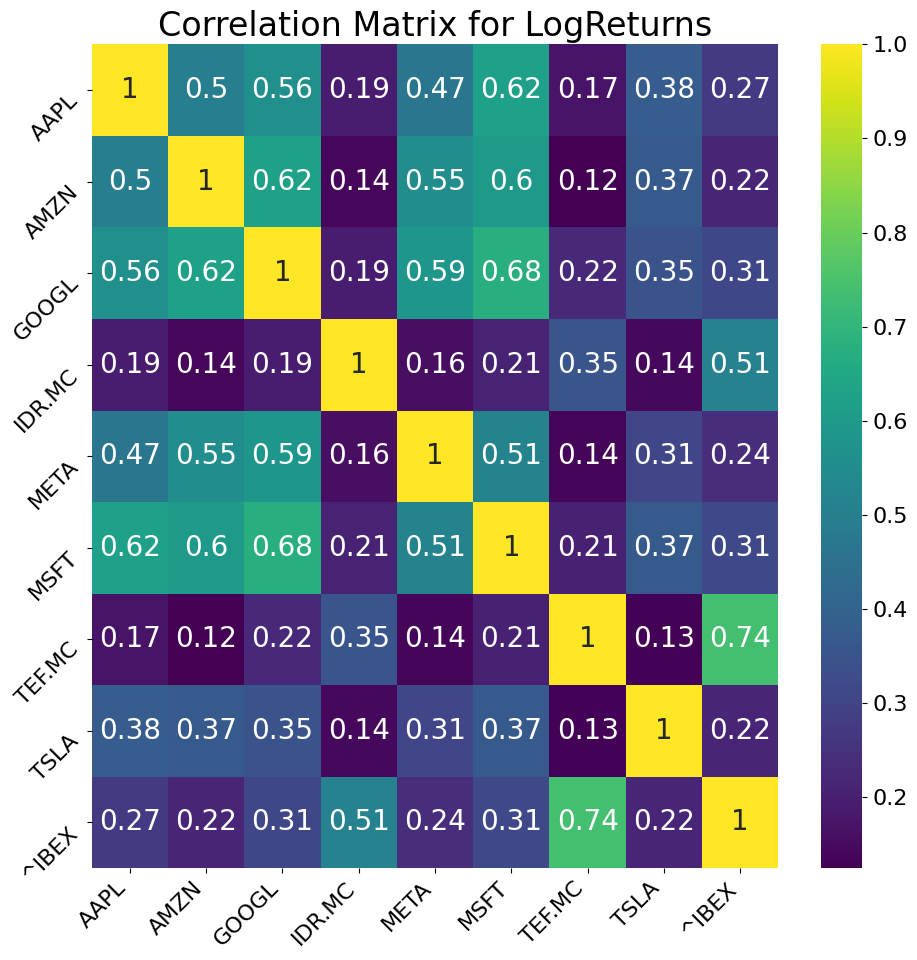

In [7]:
def plot_matrix(matrix_df, title, show=True):
    # Heatmap plot
    plt.figure(figsize=(10, 10))
    sns.heatmap(matrix_df, annot=True, cmap='viridis')

    # Layout
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=45, va='top')
    plt.xlabel(''); plt.ylabel('')
    plt.title(title)
    plt.tight_layout()
    if show:
        plt.show()

plot_matrix(corr_mat, 'Correlation Matrix for LogReturns')

**4. Compute the maximum and minimum correlations. Which are stocks having max and min correlations**

**Clue:** *Use the np.unravel_index(idx, matrix_shape) function to transform a flattened index to a cartesian one*

In [20]:
# Extract Upper Triangular Part (w/o the diagonal)
upper_triang = np.triu(corr_mat.values, k=1)

# Find the index of the max/min correlation
max_corr_idx = np.argmax(upper_triang)
min_corr_idx = np.argmin(np.where(upper_triang != 0, upper_triang, np.inf))
# since we use a half-emptied matrix, we replace zero values with np.inf to exclude them from consideration

# Transform 1D indices to fit the correaltion matrix shape
max_corr_vect = np.unravel_index(max_corr_idx, upper_triang.shape)
min_corr_vect = np.unravel_index(min_corr_idx, upper_triang.shape)

# Get the values and names of the max/min stocks correlations
max_corr_value = upper_triang[max_corr_vect]
max_corr_stock1 = corr_mat.columns[max_corr_vect[0]]
max_corr_stock2 = corr_mat.columns[max_corr_vect[1]]

min_corr_value = upper_triang[min_corr_vect]
min_corr_stock1 = corr_mat.columns[min_corr_vect[0]]
min_corr_stock2 = corr_mat.columns[min_corr_vect[1]]


print("Correlations:\n",
      f'Max:\t {max_corr_value}\t between {max_corr_stock1} & {max_corr_stock2}',
      f'Min:\t {min_corr_value}\t between {min_corr_stock1} & {min_corr_stock2}', sep='\n')

Correlations:

Max:	 0.8894352600035668	 between AVB & EQR
Min:	 0.015472156392920941	 between DLTR & NEM


**5. Compute the mean, variance and deviation of the correlations**

The deviation between each pair of assets with respect to the average correlation can be stored in another matrix, whose elements are given by

\begin{equation}
\delta_{ij}=\frac{C_{ij}-\mu_C}{\sigma_C}
\end{equation}

* Implement a function that return a DataFrame with the deviations, so that it can be plotted nicely with seaborn
* Plot the deviation matrix

**Clue:** *Use the `numpy.mean(x, axis)`, `numpy.var(x, axis)` and `numpy.std(x, axis)` methods*

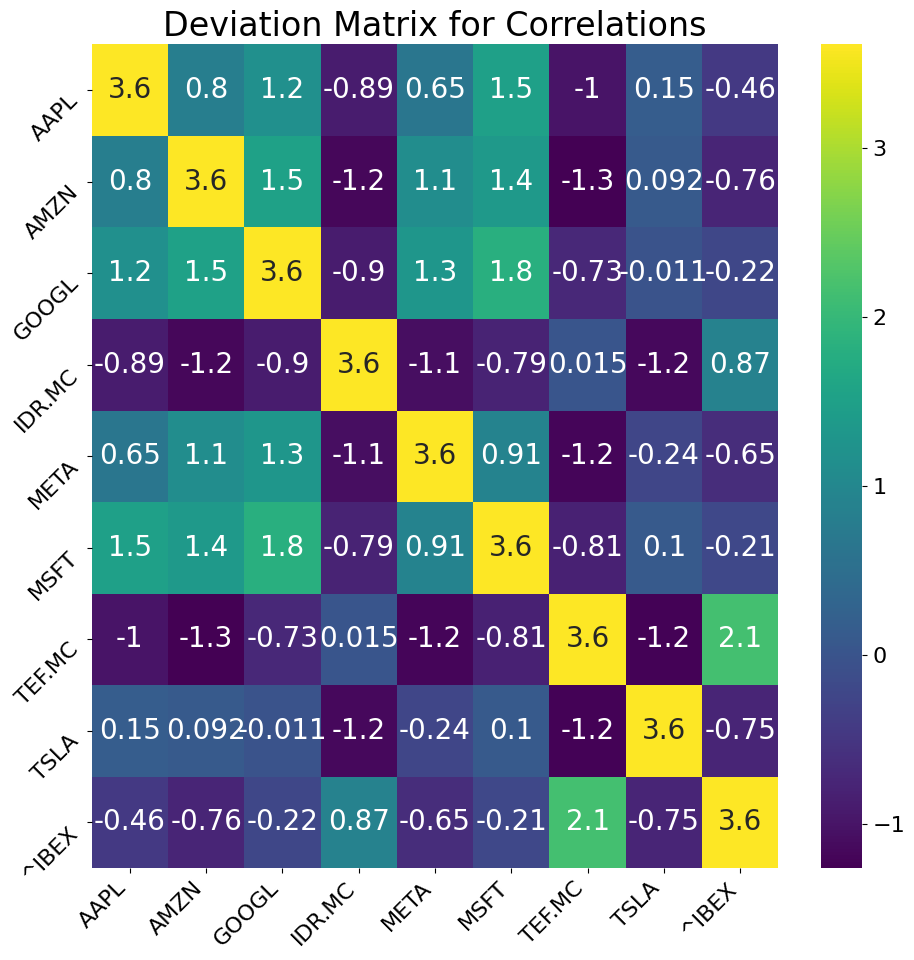

In [9]:
# Compute the mean, variance, and standard deviation (excluding the diagonal)
mean_corr = np.mean(upper_triang[upper_triang != 0])
std_corr = np.std(upper_triang[upper_triang != 0])

# Compute the deviation matrix (w/o the diag)
deviation_mat = (corr_mat - mean_corr) / std_corr

plot_matrix(deviation_mat, 'Deviation Matrix for Correlations')

# Exercise 2. Distribution of pair correlations

**IMPORTANT:** *yfinance package returns the downloaded data in alphabetical order, so if the order of our ticker list is not alphabetical and is correlated with some other array, it will all mess up!*

- So it is good practice to build the ticker list and any correlated information in alphabetical order previous to downloading the data.

In [10]:
import requests
import bs4 as bs

resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')

soup = bs.BeautifulSoup(resp.text, 'lxml')

table = soup.find('table', {'class': 'wikitable sortable'})

tickers = []
categories = []

for row in table.findAll('tr')[1:]:

    ticker = row.findAll('td')[0].text
    tickers.append(ticker)

    category = row.findAll('td')[2].text
    categories.append(category)

tickers = [s.replace('\n', '') for s in tickers]

categories = np.array(categories)

sorted_idxs = np.argsort(tickers)

tickers = np.array(tickers)[sorted_idxs].tolist()

categories = categories[sorted_idxs]

start = datetime(2000,1,1)
end = datetime(2023,1,1)

print("This will take a while...")
df = yf.download(tickers, start=start, end=end)["Adj Close"].dropna(axis=1)

bools = np.array([True  if (ticker in df.columns.values) else False for ticker in tickers])

categories = categories[bools]

df_returns = np.log(1+df.pct_change()).dropna()

df_returns.index = df_returns.index.tz_localize(None)

df_returns

This will take a while...


[************          25%%                      ]  128 of 503 completed

$BF.B: possibly delisted; No price data found  (1d 2000-01-01 00:00:00 -> 2023-01-01 00:00:00)


[*********************100%%**********************]  503 of 503 completed
ERROR:yfinance:
6 Failed downloads:
ERROR:yfinance:['KVUE', 'GEV', 'SOLV', 'VLTO']: YFChartError("%ticker%: Data doesn't exist for startDate = 946702800, endDate = 1672549200")
ERROR:yfinance:['BF.B']: YFPricesMissingError('$%ticker%: possibly delisted; No price data found  (1d 2000-01-01 00:00:00 -> 2023-01-01 00:00:00)')
ERROR:yfinance:['BRK.B']: YFTzMissingError('$%ticker%: possibly delisted; No timezone found')


Ticker,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WM,WMB,WMT,WRB,WST,WY,XEL,XOM,YUM,ZBRA
Date,,,,,,,,,,,,,,,,,,,,,
2000-01-04,-0.079464,-0.088077,-0.028988,-0.005450,-0.087618,-0.051913,-0.010471,0.000000,-0.049914,0.000000,...,-0.003603,-0.022427,-0.038136,-0.031253,0.010278,-0.038290,0.022765,-0.019340,-0.020305,-0.014533
2000-01-05,-0.064037,0.014527,-0.001840,0.088832,0.019578,0.014494,-0.015916,-0.009662,-0.065064,0.037956,...,0.003603,0.060018,-0.020620,-0.016000,-0.004098,0.051618,0.037860,0.053082,0.005115,0.018963
2000-01-06,-0.038820,-0.090514,0.034392,-0.010050,0.008130,-0.027719,0.005333,0.013262,-0.062859,-0.003732,...,-0.007220,0.021134,0.010853,0.056441,-0.010320,0.045718,-0.009332,0.050406,-0.008540,-0.055665
2000-01-07,0.080043,0.046281,0.010619,0.054067,0.047440,0.027719,0.015831,0.022499,0.112050,0.014843,...,-0.040671,0.026268,0.072846,-0.015362,0.010320,-0.033437,0.000000,-0.002939,-0.022551,-0.011160
2000-01-10,0.058813,-0.017744,-0.007067,0.032944,0.037883,0.083468,0.000000,0.024293,-0.010151,-0.007394,...,0.003767,-0.018692,-0.018417,-0.009331,0.020326,-0.004369,0.000000,-0.014079,0.039558,0.033114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,0.001475,-0.002802,0.001387,0.008397,0.005719,0.000549,0.012015,0.007415,0.000319,0.013155,...,0.009339,0.022766,0.002019,0.006419,-0.000553,0.014071,0.012770,0.026101,0.000621,0.002864
2022-12-27,0.002142,-0.013976,0.003599,0.003779,-0.009977,-0.010060,0.013541,0.000373,-0.009988,0.008342,...,0.001820,0.002697,0.000278,0.006243,0.006782,-0.000635,0.008983,0.013798,0.007728,0.011137
2022-12-28,-0.009810,-0.031166,-0.006839,-0.016163,-0.020380,-0.011908,-0.024166,-0.013281,-0.023848,-0.010019,...,-0.013444,-0.020869,-0.017678,-0.015132,-0.023464,-0.027055,-0.007229,-0.016563,-0.004552,-0.016713


**1. Annual distribution of correlations**

- Compute the correlation matrix for each year in the downloaded period
- Plot the distribution of the correlations for each year (it would be nice to make an animation)

What do you observe?

In [11]:
yearly_correlation_matrices = {}
yearly_correlations_flat = {}

for year, group in df.groupby(df.index.year): # Group the DataFrame by year
    # compute each year's correlation matrix
    corr_mat = compute_correlation_matrix(group)
    yearly_correlation_matrices[year] = corr_mat
    # Extract the upper triangular part
    upper_triangular = np.triu(corr_mat.values, k=1)
    # Flatten and remove zeros
    correlations = upper_triangular[upper_triangular != 0].flatten()
    yearly_correlations_flat[year] = correlations

yearly_correlations_flat.keys()

dict_keys([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])

**Since I was unable to show the GIF on the Colab doc, it will be downloaded**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

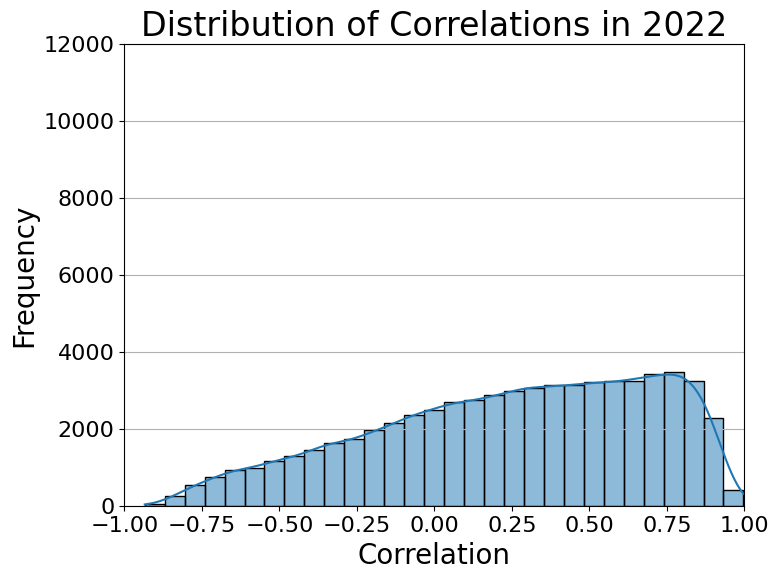

In [12]:
def plot_correlation_distribution(yearly_correlations_flat):
    years = list(yearly_correlations_flat.keys())
    fig, ax = plt.subplots()

    def update(year):
        ax.clear()
        ax.grid( axis='y')
        sns.histplot(yearly_correlations_flat[year], bins=30, kde=True, ax=ax)
        ax.set_xlim(-1, 1)
        ax.set_ylim(0, 12_000)
        ax.set_title(f'Distribution of Correlations in {year}')
        ax.set_xlabel('Correlation')
        ax.set_ylabel('Frequency')

    anim = FuncAnimation(fig, update, frames=years, interval=800, repeat=False)
    # interval in ms (1000ms = 1s)

    # Save the animation as a GIF
    gif_path = "correlation_distribution.gif"
    anim.save(gif_path, writer='imagemagick')

    return gif_path

# Plot the correlation distribution and display the animation
gif_path = plot_correlation_distribution(yearly_correlations_flat)

# Download the GIF
files.download(gif_path)

Los picos de correlación (notablemente: 2003, 2008, 2009) se pueden atribuir a grandes eventos en el mercado. Es decir, cuando una mayoria de los inversores son o optimistas o pesimistas. Si rebuscamos en los archivos historicos del mercado, observamos:

*   **2003:** Correlaciones altas impulsadas por la recuperación de la burbuja dot-com.
*   **Crisis financiera 2008:** Correlaciones extremadamente altas debido a las ventas de pánico y el riesgo sistémico.
*   **2009:** Correlaciones continuas alcistas a medida que los mercados comenzaban a recuperarse.

**2. Plot the mean and volatility (standard deviation) of the annual distribution for each year**

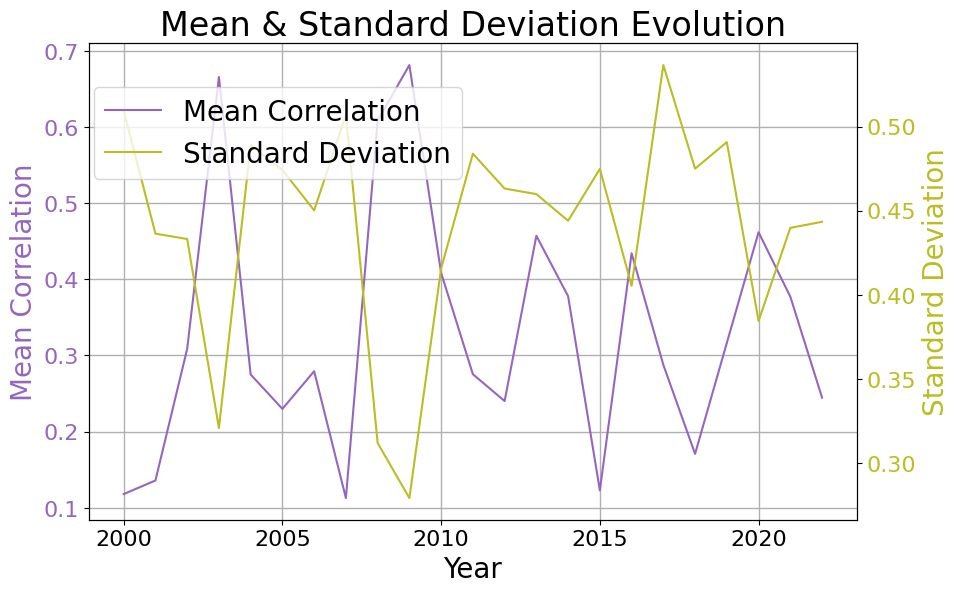

In [13]:
def compute_mean_std(yearly_correlations_flat):
    mean_n_std_yearly = []

    for year, correlations in yearly_correlations_flat.items():
        mean_corr = np.mean(correlations)
        std_corr = np.std(correlations)
        mean_n_std_yearly.append((year, mean_corr, std_corr))

    return pd.DataFrame(mean_n_std_yearly, columns=['Year', 'Mean', 'Standard Deviation'])


def plot_mean_std(mean_std_df):
    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.grid(linewidth=1)
    ax1.set_xlabel('Year')
    ax1.set_ylabel('Mean Correlation', color='tab:purple')
    ax1.plot(mean_std_df['Year'], mean_std_df['Mean'], color='tab:purple', label='Mean Correlation')
    ax1.tick_params(axis='y', labelcolor='tab:purple')

    ax2 = ax1.twinx()
    ax2.set_ylabel('Standard Deviation', color='tab:olive')
    ax2.plot(mean_std_df['Year'], mean_std_df['Standard Deviation'], color='tab:olive', label='Standard Deviation')
    ax2.tick_params(axis='y', labelcolor='tab:olive')

    fig.tight_layout()
    plt.title('Mean & Standard Deviation Evolution')
    fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
    plt.show()

mean_std_df = compute_mean_std(yearly_correlations_flat)
plot_mean_std(mean_std_df)

# Exercise 3. Asset graph

A graph (or network) is a structure amounting to a set of objects in which some pairs of the objects are in some sense "related". The objects correspond to mathematical abstractions called **vertices** (also called nodes or points) and each of the related pairs of vertices is called an **edge** (also called link or line). Typically, a graph is depicted as a set of circles for the vertices joined by lines or curves for the edges.

The edges may be **directed** or **undirected**. For example, if the vertices represent people at a party, and there is an edge between two people if they shake hands, then this graph is undirected because any person A can shake hands with a person B only if B also shakes hands with A. In contrast, if an edge from a person A to a person B means that A owes money to B, then this graph is directed, because owing money is not necessarily reciprocated.

The network can be **weighted** or unweighted, this is, the links can have different values corresponding to the "strength" of the interactions or only
take binary values (0:no link, 1:link), indicating the existence or not of a relation.

**NetworkX** is the main Python library for working with networks (https://networkx.org/)

In our case, the **asset graph** is an undirected weighted graph in which the nodes correspond to different assets and the links are the correlation coefficients among them.

**1. Complete the function below to build the asset graph and plot the result**

Here I already provide all the code for the plot, but feel free to explore in the documentation of NetworkX for other layouts and other settings! Later you will have to do the network plots yourselves (just copy the code here and re-use it)

**Clue:** *Use the `G.add_edge(node_1_idx, node_2_idx, weight=w)` method*

In [14]:
import networkx as nx

def asset_graph(corr_mat, threshold):

    #Set number of nodes
    N = corr_mat.shape[0]

    #Build an empty graph
    G = nx.Graph()
    #Add nodes
    G.add_nodes_from(np.arange(0, N, 1))

    #Add links between each pair of nodes if some criteria is met (in this case, p_ij>threshold)
    for i in range(N):
        for j in range(i + 1, N):
            c = corr_mat[i, j]
            if c > threshold:
                G.add_edge(i, j, weight=c)

    return G

<ipython-input-15-5499b7ee5288>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('tab20', len(unique_categories))


Ticker,A,AAPL,ABT,ACGL,ADBE,ADI,ADM,ADP,ADSK,AEE,...,WM,WMB,WMT,WRB,WST,WY,XEL,XOM,YUM,ZBRA
Ticker,,,,,,,,,,,,,,,,,,,,,
A,1.000000,0.372678,0.255869,0.266024,0.439608,0.540169,0.275880,0.385740,0.442178,0.253744,...,0.312275,0.282088,0.260187,0.290269,0.359871,0.380400,0.179873,0.303563,0.321453,0.356306
AAPL,0.372678,1.000000,0.224693,0.230387,0.428020,0.436771,0.229022,0.332062,0.385978,0.215104,...,0.261534,0.220520,0.255102,0.228392,0.293003,0.311585,0.165683,0.267088,0.246596,0.356506
ABT,0.255869,0.224693,1.000000,0.275420,0.276854,0.249329,0.298214,0.408558,0.278017,0.379620,...,0.338606,0.203139,0.312329,0.340606,0.347602,0.343021,0.302048,0.339670,0.327176,0.249008
ACGL,0.266024,0.230387,0.275420,1.000000,0.254045,0.253241,0.345542,0.380151,0.270884,0.375663,...,0.341883,0.227458,0.246555,0.504309,0.254989,0.416207,0.234709,0.382734,0.316975,0.282447
ADBE,0.439608,0.428020,0.276854,0.254045,1.000000,0.520181,0.253105,0.408209,0.512488,0.273947,...,0.304804,0.232320,0.274467,0.274546,0.335155,0.357039,0.215972,0.274395,0.309428,0.385798
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WY,0.380400,0.311585,0.343021,0.416207,0.357039,0.374663,0.423117,0.483207,0.380714,0.423273,...,0.426611,0.342749,0.337768,0.453143,0.351846,1.000000,0.301516,0.483951,0.432070,0.380054
XEL,0.179873,0.165683,0.302048,0.234709,0.215972,0.201642,0.275858,0.321591,0.181515,0.629311,...,0.301731,0.196021,0.234227,0.301154,0.244582,0.301516,1.000000,0.305490,0.251012,0.173432
XOM,0.303563,0.267088,0.339670,0.382734,0.274395,0.301269,0.463176,0.450319,0.311663,0.443294,...,0.367234,0.423277,0.291925,0.419415,0.282881,0.483951,0.305490,1.000000,0.354437,0.304231


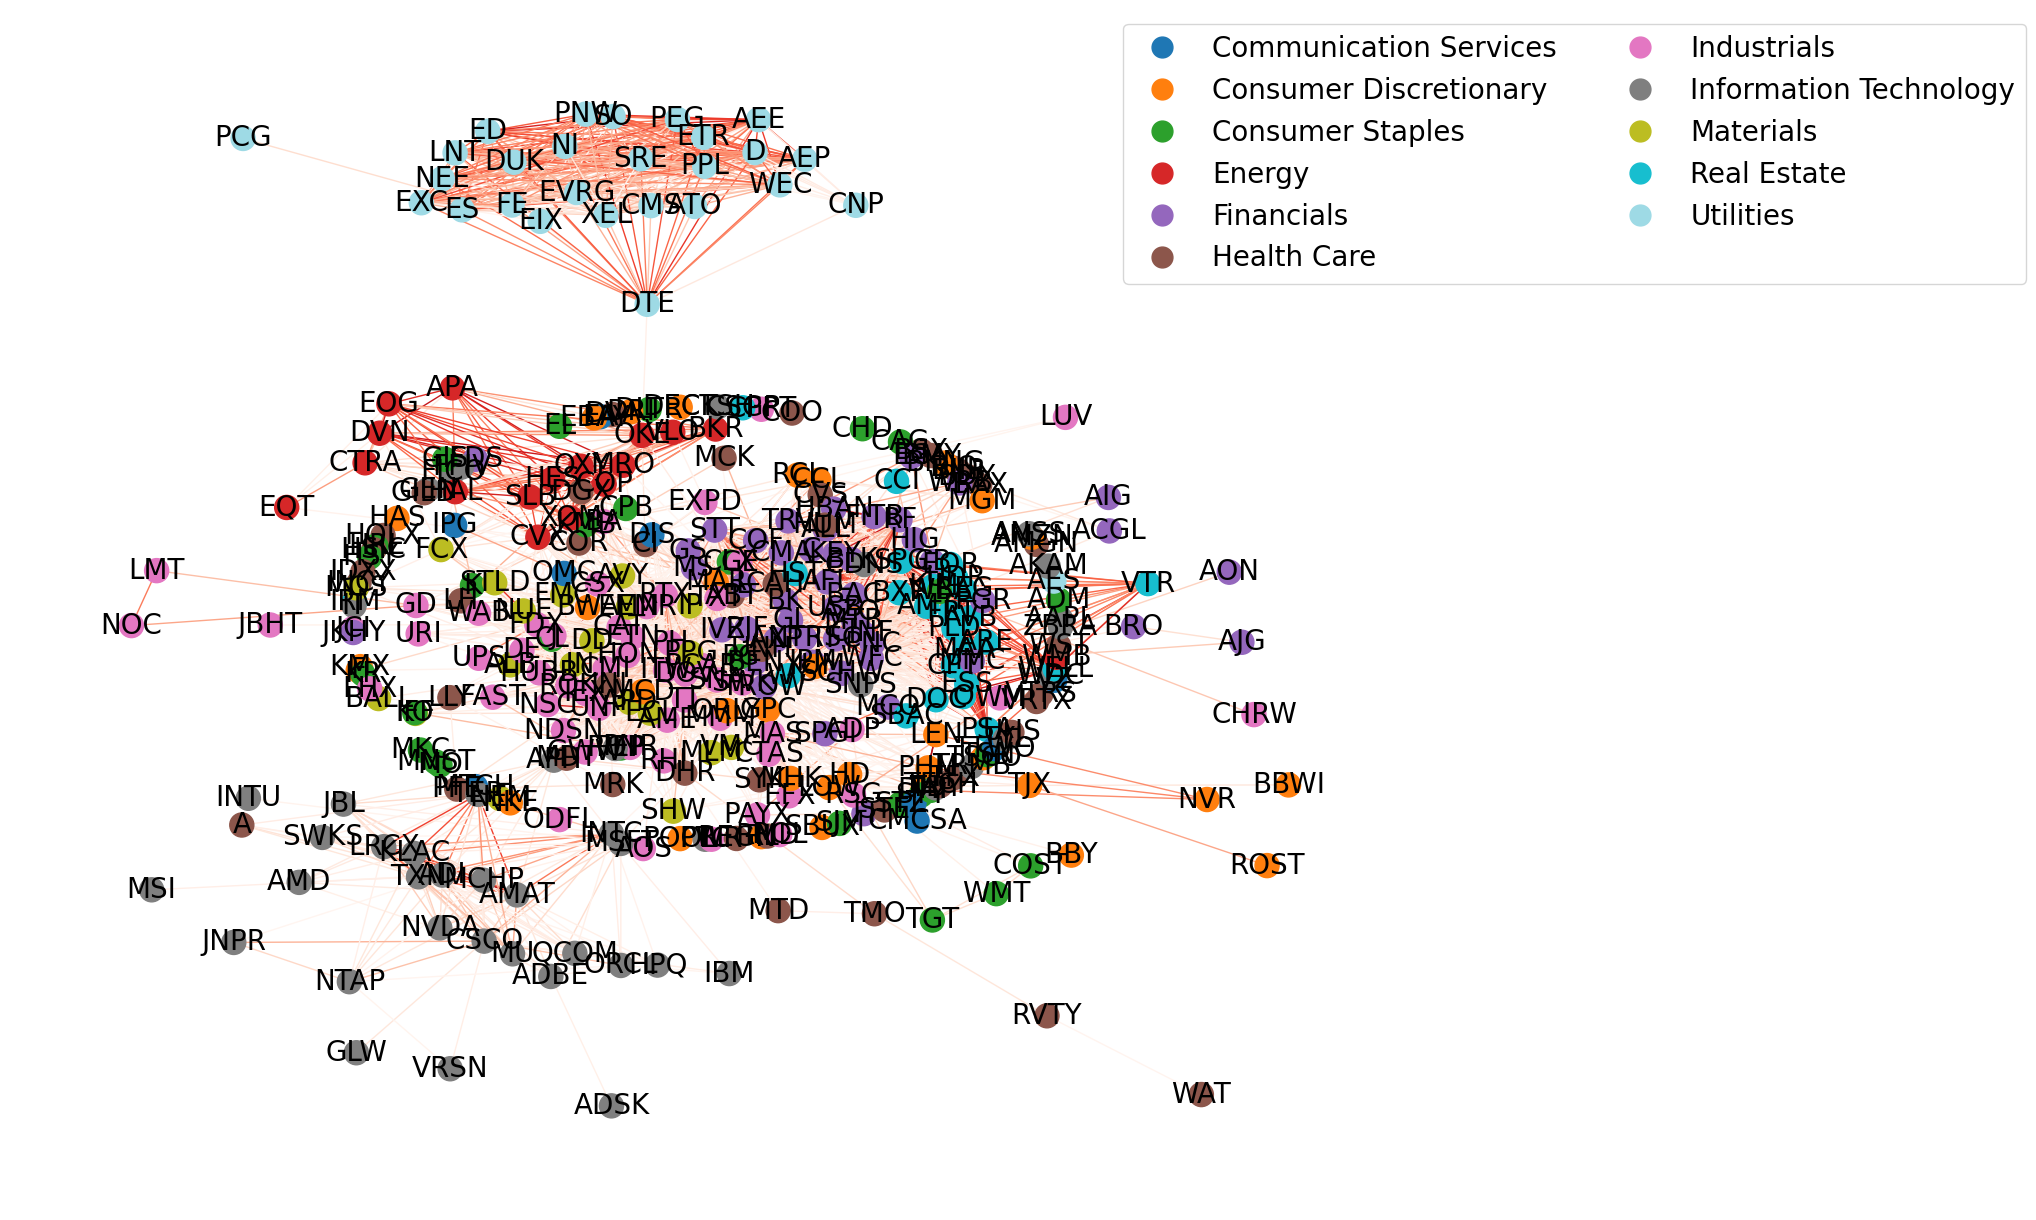

In [15]:
threshold = 0.5

#Compute correlation matrix
corr_mat = df_returns.corr()

#Build network with given threshold value
G = asset_graph(corr_mat.values, threshold)

def plot_graph(G, edge_mat):
    'I have placed these lines of code in a fuction to later plot the MST'

    #Obtain the edges and their weights from the network
    edges, weights = zip(*nx.get_edge_attributes(G, 'weight').items())

    #Names of assets (nodes)
    labels = dict(zip(np.arange(0, edge_mat.shape[0], 1), edge_mat.columns.values))

    #Add color for each category
    color_code = np.copy(categories)

    unique_categories = np.unique(categories)

    cmap = mpl.cm.get_cmap('tab20', len(unique_categories))

    colors = [mpl.colors.rgb2hex(cmap(i)[:3]) for i in range(cmap.N)]

    for i in range(len(unique_categories)):
        color_code[categories == unique_categories[i]] = colors[i]

    #Plot
    plt.figure(figsize=(14, 12))

    nx.draw(G, pos = nx.kamada_kawai_layout(G), edgelist=edges, node_color=color_code, edge_color=weights, edge_cmap=plt.cm.Reds, with_labels=True,
            labels=labels, font_size=20)

    legend_elements = [Line2D([0], [0], ls="", marker='o', color=colors[i], label=unique_categories[i], markerfacecolor=colors[i], markersize=15)
    for i in range(len(unique_categories))]

    plt.legend(handles=legend_elements, loc="upper right", ncol=2, bbox_to_anchor=(1.45, 1))

plot_graph(G, corr_mat)

corr_mat

# Exercise 4. Distances, Minimum Spanning Tree & Hierarchical Tree

The correlations between each pair of assets allow to define a **distance** (in the mathematical sense) between them. It can be shown that this distance can be easily computed as

\begin{equation}
d_{ij}=\sqrt{2(1-C_{ij})}
\end{equation}

Thus, the **more correlation** between a pair of assets, the **less distance** between them.

The concept of distance between assets, in turn, allows to compute the **Minimum Spanning Tree (MST)** of the asset graph.

In graph theory, a **tree** is a graph in which every pair of nodes is connected by only one path. A **spanning tree** of a given graph is a *tree* that connects all its nodes. Given a *weighted graph*, its **MST** is the *spanning tree* that minimizes the sum of its edge weights.

Thus, to compute the **MST** of the asset graph we first have to compute the distance matrix and use this distance matrix to construct the asset graph (fully connected, no threshold needed now). Finally, we can easily compute the **MST** using NetworkX.

From the distance matrix we can also compute the **Hierarchical tree** associated to the **MST** using SciPy.

**1. Create a function to compute the distance matrix**

In [16]:
corr_mat

dist_mat = np.sqrt(2 * (1 - corr_mat))

**2. Create a function to create a fully connected and weighted network from the distance matrix (nodes are connected to each other with a weight corresponding to the distance between them).**

**Note:** *Modify the `asset_graph` function implemented before*

In [17]:
def asset_graph_dist(dist_mat):
    # Number of assets
    N = dist_mat.shape[0]
    # Initialize graph
    G = nx.Graph()
    #Add nodes
    G.add_nodes_from(np.arange(0, N, 1))

    # Add links between nodes
    for i in range(N):
        for j in range(i + 1, N):
            G.add_edge(i, j, weight=dist_mat[i, j])

    return G

G = asset_graph_dist(dist_mat.values)

**3. Compute the Minimum Spanning Tree**

To do so, you first have to compute the distance matrix and then generate the fully connected and weighted network. From this network you can compute the MST with `networkx.minimum_spanning_tree(G)` method.

<ipython-input-15-5499b7ee5288>:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = mpl.cm.get_cmap('tab20', len(unique_categories))


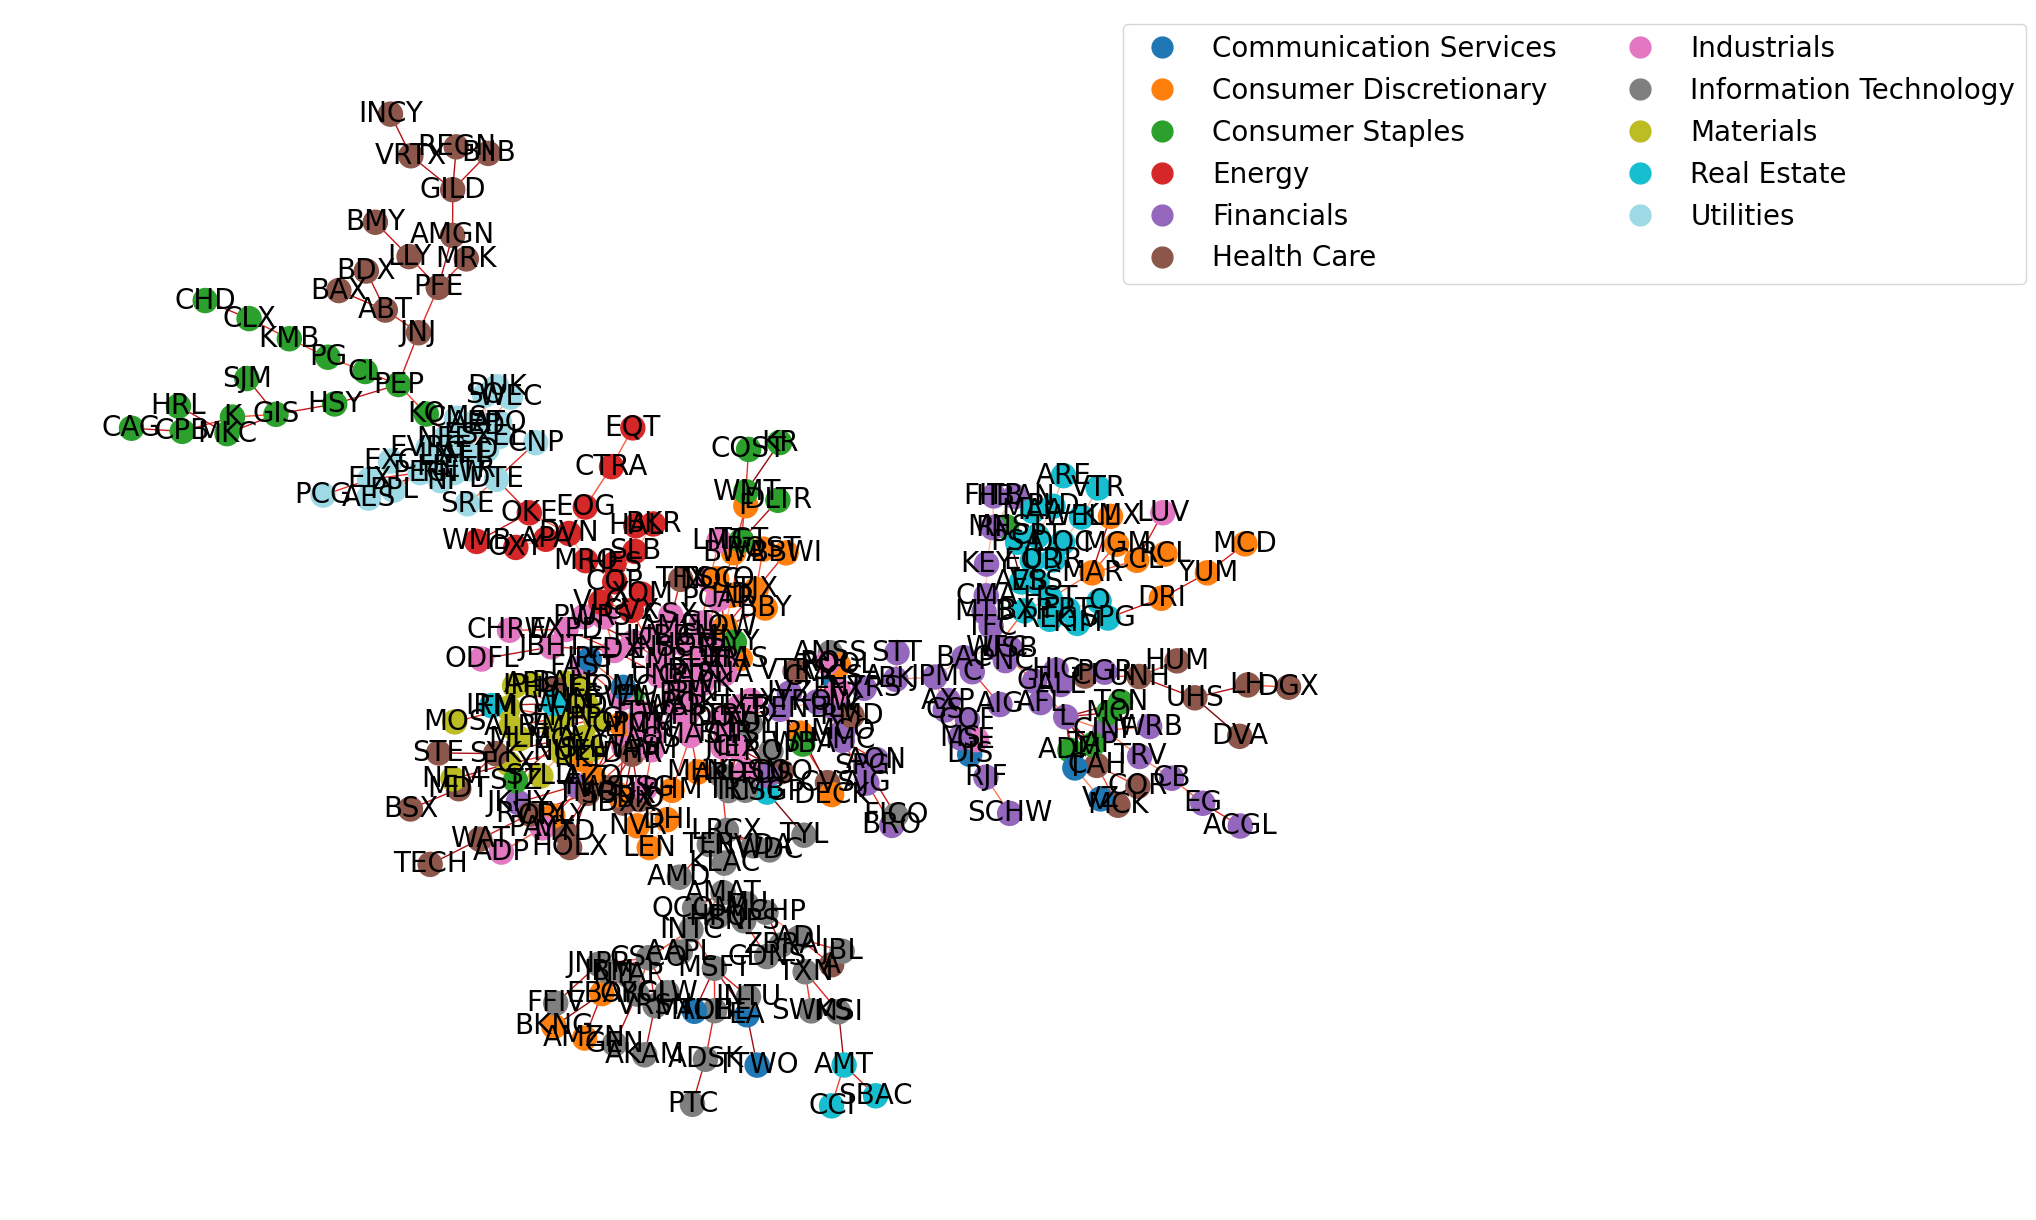

In [18]:
MST = nx.minimum_spanning_tree(G)

plot_graph(MST, dist_mat)

**2. Compute the associated hierarchical tree**

- Convert the vector-form distance matrix to a square-form distance matrix using `scipy.spatial.distance.squareform(x)` method

- Create the hierarchical tree using `scipy.cluster.hierarchy.dendogram(matrix, method, metric) ` method using `ward` method and `euclidian`distance

- Plot the tree using the `scipy.cluster-hierarchy(linkage_data)` method

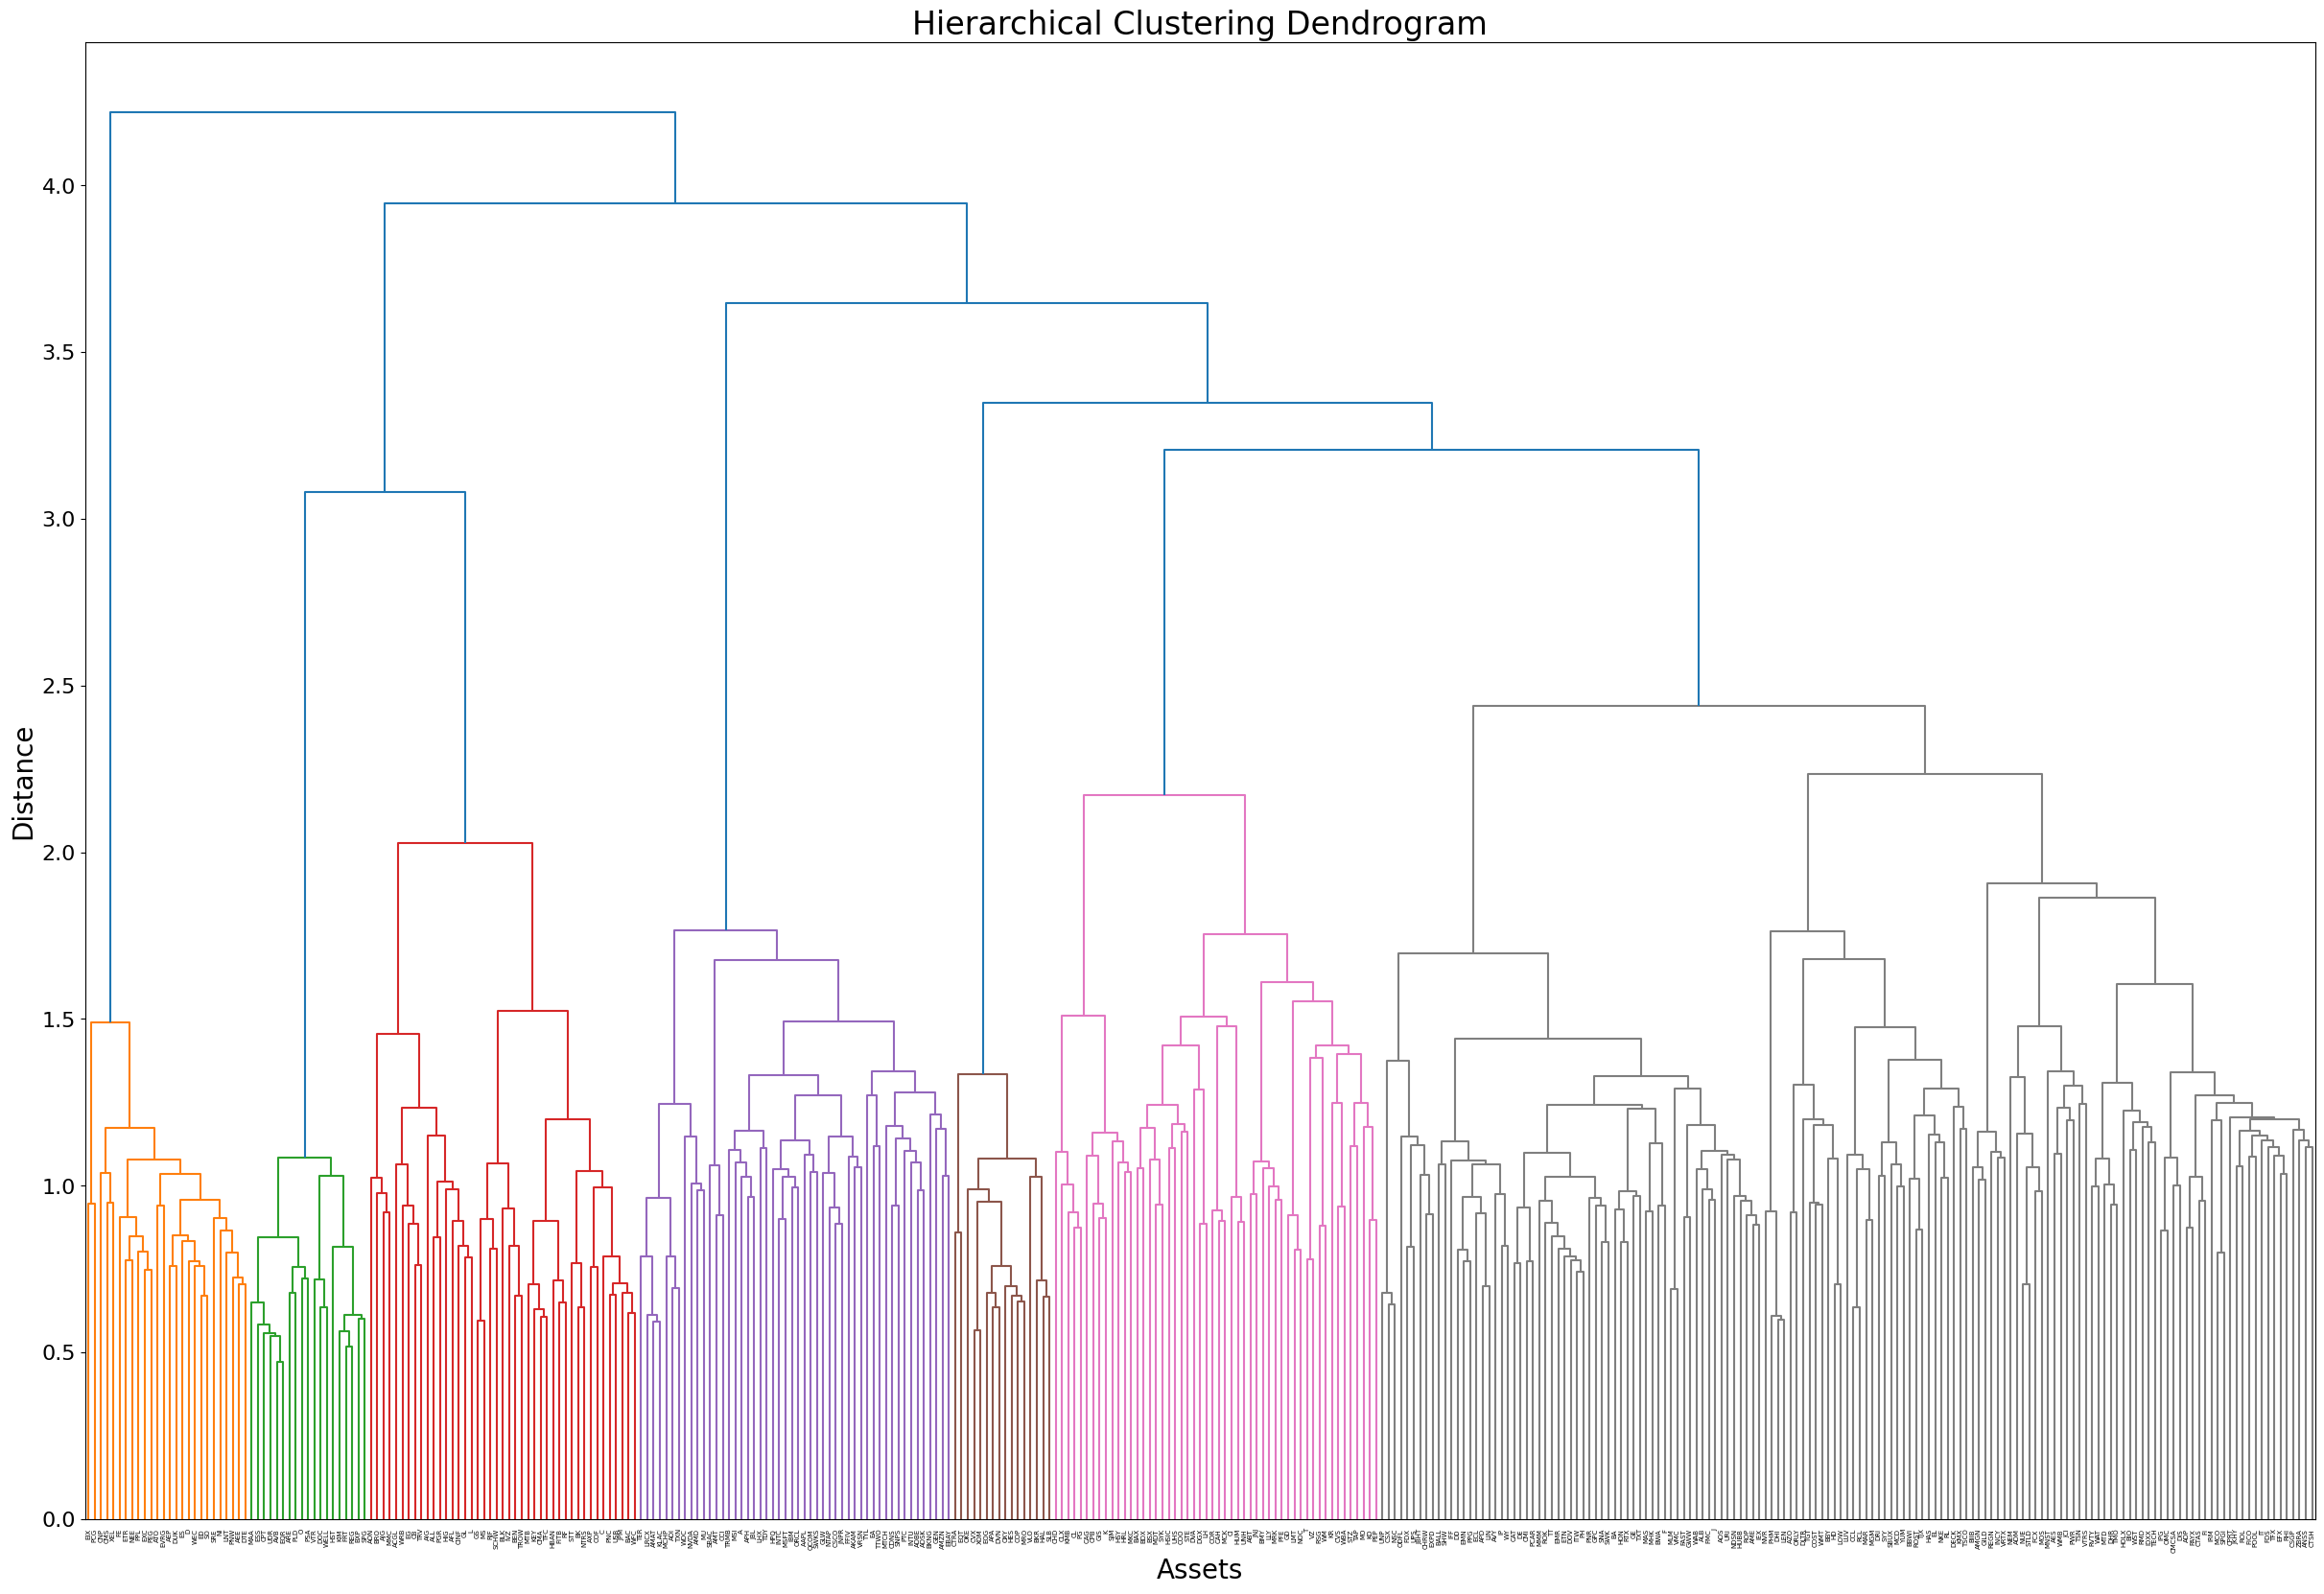

In [19]:
def plot_hierarchical_tree(dist_mat):
    plt.figure(figsize=(30, 20))
    # Distance matrix to vector-form
    dist_vect = sp.spatial.distance.squareform(dist_mat)

    linkage_matrix = sp.cluster.hierarchy.linkage(dist_vect, method='ward', metric='euclidean')
    # Tree
    sp.cluster.hierarchy.dendrogram(linkage_matrix, labels=dist_mat.columns)

    # Adding titles and labels
    plt.title("Hierarchical Clustering Dendrogram")
    plt.xlabel("Assets");    plt.ylabel("Distance")

plot_hierarchical_tree(dist_mat)